In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import correlate
import pyroomacoustics as pra
import soundfile as sf
from IPython.display import Audio
from scipy.fft import fft, ifft
from scipy.signal import correlate

import doascripts as doa
import simscripts as sim
import plotting as pt
import measuring as meas

Se define el diccionario base a partir del cual se ajustarán los parámetros pertenecientes a la simulación.

In [21]:
dicc_base_rt60 = {
    "room_dim": [5, 5, 5], 
    "rt60": 0.5,
    "mic_amount": 4,
    "mic_start": [1, 2.5, 1],
    "mic_dist": 0.1,
    "source_pos": [2.5, 2.5, 2.5],
    "fs": 48000}
    
sim.expand_param(dicc_base, "rt60", 0.02, n=150, filename = "variación_rt60")

{'room_dim': [5, 5, 5],
 'rt60': [0.2,
  0.22,
  0.24000000000000002,
  0.26,
  0.28,
  0.30000000000000004,
  0.32,
  0.34,
  0.36,
  0.38,
  0.4,
  0.42000000000000004,
  0.44,
  0.46,
  0.48000000000000004,
  0.5,
  0.52,
  0.54,
  0.56,
  0.5800000000000001,
  0.6000000000000001,
  0.62,
  0.64,
  0.66,
  0.6799999999999999,
  0.7,
  0.72,
  0.74,
  0.76,
  0.78,
  0.8,
  0.8200000000000001,
  0.8400000000000001,
  0.8600000000000001,
  0.8800000000000001,
  0.9000000000000001,
  0.9199999999999999,
  0.94,
  0.96,
  0.98,
  1.0,
  1.02,
  1.04,
  1.06,
  1.08,
  1.1,
  1.12,
  1.1400000000000001,
  1.16,
  1.18,
  1.2,
  1.22,
  1.24,
  1.26,
  1.28,
  1.3,
  1.32,
  1.34,
  1.3599999999999999,
  1.38,
  1.4,
  1.42,
  1.44,
  1.46,
  1.48,
  1.5,
  1.52,
  1.54,
  1.56,
  1.58,
  1.6,
  1.6199999999999999,
  1.64,
  1.66,
  1.68,
  1.7,
  1.72,
  1.74,
  1.76,
  1.78,
  1.8,
  1.82,
  1.84,
  1.86,
  1.88,
  1.9,
  1.92,
  1.94,
  1.96,
  1.98,
  2.0,
  2.02,
  2.04,
  2.06,
  2.

In [22]:
rt60, error_rt60 = doa.full_doa_pipeline("variación_rt60.json", "Audios/imp.wav", method="classicfft", variable_param="rt60")

In [85]:
pt.plot_signals((rt60, error_rt60, 1, "Variación RT60", "b", "RT60", None), grid=True)

NameError: name 'rt60' is not defined

In [70]:
dicc_base_fs = {
    "room_dim": [5, 5, 5], 
    "rt60": 0.2,
    "mic_amount": 4,
    "mic_start": [1, 1, 1],
    "mic_dist": 0.1,
    "source_pos": [1, 2.5, 1],
    "fs": 2000}

sim.expand_param(dicc_base_fs, "fs", 1000, n=150, filename = "variación_fs")

{'room_dim': [5, 5, 5],
 'rt60': 0.2,
 'mic_amount': 4,
 'mic_start': [1, 1, 1],
 'mic_dist': 0.1,
 'source_pos': [1, 2.5, 1],
 'fs': [2000,
  3000,
  4000,
  5000,
  6000,
  7000,
  8000,
  9000,
  10000,
  11000,
  12000,
  13000,
  14000,
  15000,
  16000,
  17000,
  18000,
  19000,
  20000,
  21000,
  22000,
  23000,
  24000,
  25000,
  26000,
  27000,
  28000,
  29000,
  30000,
  31000,
  32000,
  33000,
  34000,
  35000,
  36000,
  37000,
  38000,
  39000,
  40000,
  41000,
  42000,
  43000,
  44000,
  45000,
  46000,
  47000,
  48000,
  49000,
  50000,
  51000,
  52000,
  53000,
  54000,
  55000,
  56000,
  57000,
  58000,
  59000,
  60000,
  61000,
  62000,
  63000,
  64000,
  65000,
  66000,
  67000,
  68000,
  69000,
  70000,
  71000,
  72000,
  73000,
  74000,
  75000,
  76000,
  77000,
  78000,
  79000,
  80000,
  81000,
  82000,
  83000,
  84000,
  85000,
  86000,
  87000,
  88000,
  89000,
  90000,
  91000,
  92000,
  93000,
  94000,
  95000,
  96000,
  97000,
  98000,
  

In [71]:
fs, error_fs = doa.full_doa_pipeline("variación_fs.json", "Audios/imp.wav", method="classicfft", variable_param="fs")

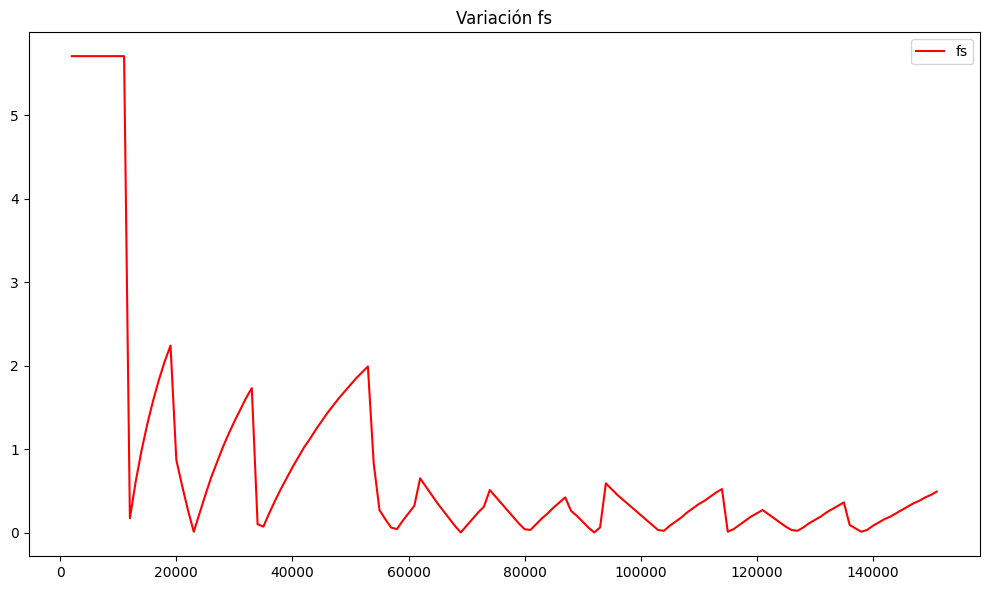

In [86]:
pt.plot_signals((fs, error_fs, 1, "Variación fs", "r", "fs", None))

Procesando: Impulso - classicfft
Procesando: Impulso - phat
Procesando: Impulso - scot
Procesando: Impulso - roth
Procesando: Impulso - eckart
Procesando: Impulso - ml
Procesando: Voz femenina - classicfft
Procesando: Voz femenina - phat
Procesando: Voz femenina - scot
Procesando: Voz femenina - roth
Procesando: Voz femenina - eckart
Procesando: Voz femenina - ml


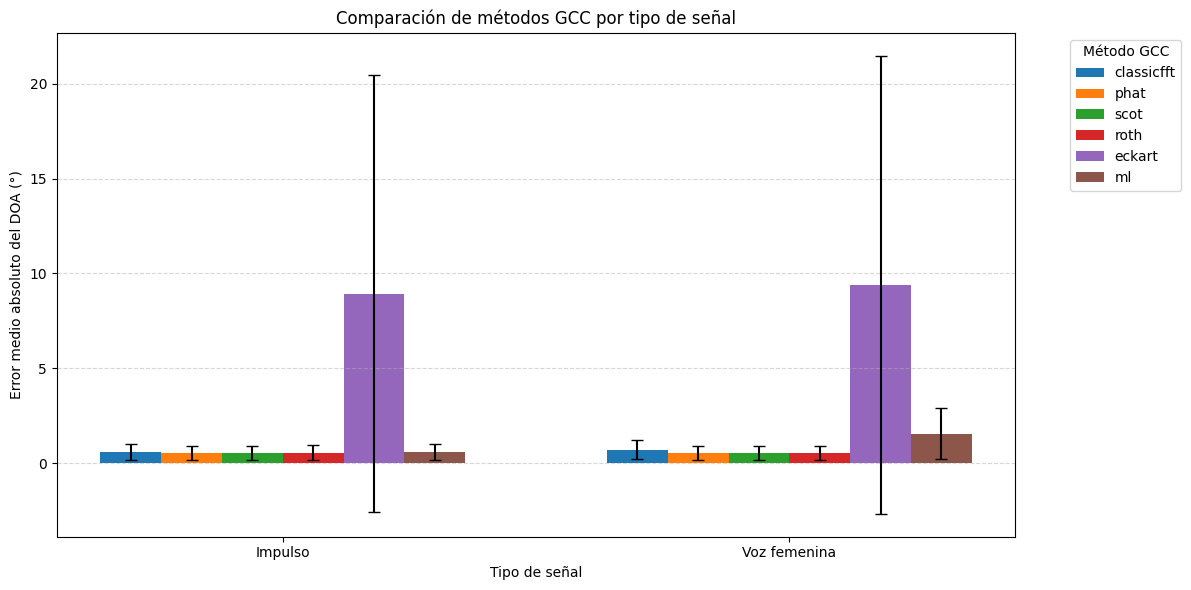

In [84]:
# Señales a iterar
signals = [
    ("imp.wav", "Impulso"),
    #("guitar.wav", "Guitarra"),
    ("fem_voice.wav", "Voz femenina"),
    #("male_voice.wav", "Voz masculina"),
]

# Métodos a usar
methods = [
    #"classictemp", 
    "classicfft",
    "phat", "scot", "roth", "eckart", "ml"
]

# Diccionario para guardar resultados
results = {}

# Correr combinaciones
for sig_file, sig_label in signals:
    mean_errors = []
    std_errors = []
    for method in methods:
        print(f"Procesando: {sig_label} - {method}")
        try:
            x, y = doa.full_doa_pipeline(
                "Mic_Pos1.json", 
                f"Audios/{sig_file}",
                method=method,
                variable_param="mic_start",
                return_error=True
            )
            mean_errors.append(np.mean(y))
            std_errors.append(np.std(y))
        except Exception as e:
            print(f"Error con {sig_label} - {method}: {e}")
            mean_errors.append(np.nan)
            std_errors.append(np.nan)
    results[sig_label] = (mean_errors, std_errors)

# === Gráfico agrupado por señal ===
n_signals = len(signals)
n_methods = len(methods)
bar_width = 0.12
group_spacing = 0.25

# Posiciones de los grupos de señales
group_centers = np.arange(n_signals)
method_offsets = (np.arange(n_methods) - (n_methods - 1) / 2) * bar_width

plt.figure(figsize=(12, 6))

for i, method in enumerate(methods):
    bar_vals = [results[label][0][i] for _, label in signals]
    bar_errs = [results[label][1][i] for _, label in signals]
    bar_pos = group_centers + method_offsets[i]
    plt.bar(bar_pos, bar_vals, width=bar_width, yerr=bar_errs, capsize=4, label=method)

# Etiquetas centradas por grupo de señal
plt.xticks(group_centers, [label for _, label in signals])
plt.xlabel("Tipo de señal")
plt.ylabel("Error medio absoluto del DOA (°)")
plt.title("Comparación de métodos GCC por tipo de señal")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Método GCC", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
